In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Generate $X$, $\beta$ and $Y$

In [2]:
def generate_dataset(number_of_data_points=1000, dim=1000, sigma=0.1):
    X = np.random.normal(0, 1, size=(number_of_data_points, dim))
    beta = np.random.normal(0, 1, size=(dim,)) # normal distribution
    #beta = np.random.uniform(0, 1, size=(dim,)) # uniform distribution
    beta /= np.sqrt(np.sum(beta ** 2))
    noise = np.random.normal(0, sigma, size=(number_of_data_points,))
    Y = X @ beta + noise
    return X, Y

def split_dataset(X, Y, training_size, testing_size):
    X, Y = generate_dataset(training_size + testing_size)
    X_test = X[:testing_size,]
    X_train = X[testing_size:,]
    Y_test = Y[:testing_size]
    Y_train = Y[testing_size:]
    return X_train, Y_train, X_test, Y_test

def predict(X_train, Y_train, X_test, Y_test, dim=1000):
    if (training_size < dim):
        # pseudo inverse
        beta_prime = np.linalg.pinv(X_train) @ Y_train
        Y_prediction = X_test @ beta_prime
    else:  
        # linear regression
        reg = LinearRegression().fit(X_train, Y_train)
        Y_prediction = reg.predict(X_test)
    return mean_squared_error(Y_prediction, Y_test)

In [20]:
training_size_list = np.array([i for i in range(100, 900, 100)])
training_size_list = np.hstack((training_size_list, [i for i in range(900, 1100, 10)]))
training_size_list = np.hstack((training_size_list, [i for i in range(1100, 2100, 100)]))

testing_size = 10000

In [21]:
results = np.zeros((training_size_list.shape[0],))
for i, training_size in enumerate(training_size_list):
    X, Y = generate_dataset(training_size + testing_size)
    X_train, Y_train, X_test, Y_test = split_dataset(X, Y, training_size, testing_size)
    results[i] = predict(X_train, Y_train, X_test, Y_test)

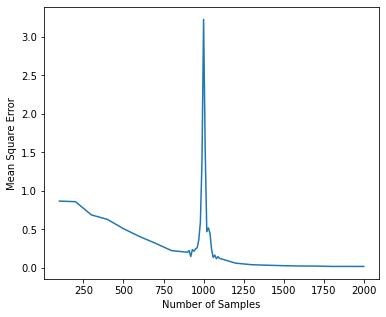

In [24]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Mean Square Error')
ax.plot(training_size_list, results)
plt.show()